In [1]:
import torch
import pytorch_lightning as pl
import numpy as np
from model.nif import NIF_small
import matplotlib.pyplot as plt

/home/juandiego/miniconda3/envs/ptml/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/juandiego/miniconda3/envs/ptml/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


In [2]:
# File Names
data_file = 'data/tw_train.npz'
chkpnt = "/home/juandiego/pytorch-sandbox/PT_NIF/lightning_logs/version_4/checkpoints/epoch=60723-step=325070.ckpt"

In [15]:
# Load reference data
data = np.load(data_file)['data']
mean = np.load(data_file)['mean']
std  = np.load(data_file)['std' ]

NX = 300
NT = 20  

# using only the normalized data
data_raw = data # visualize the normalized data, how it works
input_arr_t = data_raw[:20000,1].reshape(-1,1)
input_arr_x = data_raw[:20000,0].reshape(-1,1)

In [9]:
batch = np.array([input_arr_x,input_arr_t])
batch = torch.Tensor(batch)
batch.shape

torch.Size([2, 6000, 1])

In [10]:
model = NIF_small.load_from_checkpoint(chkpnt)
model.eval()

NIF_small(
  (param_net): ParamNet(
    (linear_stack): Sequential(
      (0): Linear(in_features=1, out_features=2, bias=True)
      (1): SiLU()
      (2): Linear(in_features=2, out_features=2, bias=True)
      (3): SiLU()
      (4): Linear(in_features=2, out_features=1, bias=True)
      (5): SiLU()
      (6): Linear(in_features=1, out_features=19, bias=True)
    )
  )
)

In [20]:
with torch.no_grad():
    yhat = model(batch)
    yhat = yhat*std[-1] + mean[-1]
    yhat = yhat.reshape(NT,NX)

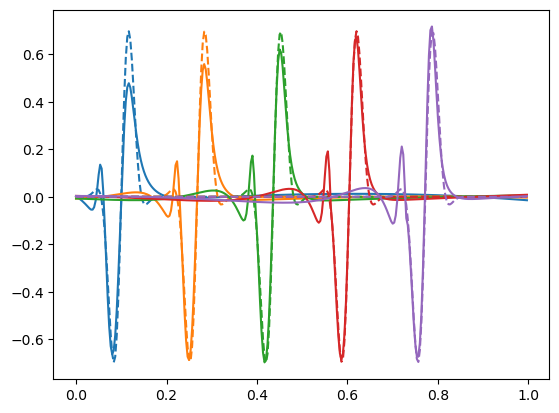

In [21]:
y = data_raw[:,2].reshape(-1,1)*std[-1] + mean[-1]
y = y.reshape(NT,NX)
x = np.linspace(0,1,NX,endpoint=False)
fig,ax = plt.subplots(1,1)
for i in range(0,NT,4):
    p = ax.plot(x,yhat[i,:],ls='-')
    ax.plot(x,y[i,:],ls='--',c=p[0].get_color())